# Coursera - Audio Signal Processing - Week 1
<https://class.coursera.org/audio-001/wiki/week1>

In [2]:
#from __future__ import print_function
#from IPython.html.widgets import interact, interactive, fixed
#from IPython.html import widgets
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Lecture 4 - 1T4 - Basic Math

### Sinusoids

This is a function for sinusoids:

$$y = A * cos(2*\pi*f*n + \phi)$$

$f \rightarrow$ the **frequency** in $Hz$

$fs \rightarrow$ the **sample frequency** or samples per second.

$T=1/fs \rightarrow$ the **sampling period**. It is the number of seconds in between each sample

$n \rightarrow$ the **sampling index** . To give it units before your feed it into the cosine equation, you multiply it by $T \rightarrow$ the sampling period.

$t \rightarrow n*T$ the **sample time** in time units. Usually an array of milli/micro seconds which is created by dividing the **sampling indices** by $fs$, or multiplying by $T$.

$phi \rightarrow$ the **phase angle** in radians. Negative $phi$ means the cosine wave is shifter towards the left, positive means the wave is shifted towards the right.  

<function __main__.do_cos>

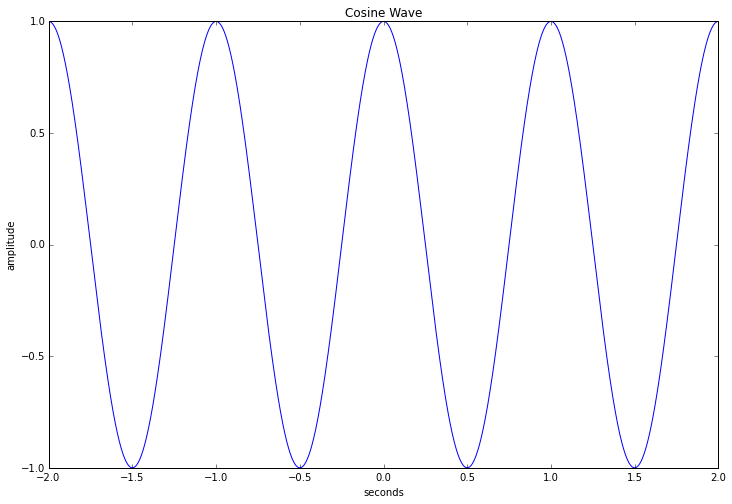

In [3]:
def do_cos(A=1, t_start=-2, t_stop=2, fs=44100, f=1, phi=0):
    # Given sampling freq per second, time period in seconds of each sample
    T = 1.0/fs 
    
    # How many seconds are we sampling for
    length_t = t_stop - t_start
    
    # The sampling index array - for the sampling range, spaced in T seconds.
    t = np.arange(float(t_start), t_stop, T)  
    
    # Code above is also equivalent to - sample index array of fs*length_t samples 
    #  samples per second * total number of seconds = number of samples
    total_samples = fs*length_t
    t = np.linspace(float(t_start), t_stop, total_samples)
    
    # A*cos(2*pi*freq*x + phi)
    # A*cos(wx + phi)
    x = (2 * np.pi * f * t)
    y = A * np.cos(x + phi)
    fig = plt.figure(figsize=(12,8))
    plt.plot(t, y)
    plt.xlabel("seconds")
    plt.ylabel("amplitude")
    plt.title('Cosine Wave')
    
interact(do_cos, A=(0,5,0.2), t_start=(-10,10,1), t_stop=(-9,11,1), \
        f=(0,10,0.5), fs = fixed(44100), phi=(-np.pi, np.pi, 0.1)) # sampling frequency

 ### Complex Numbers

#### Euler's Formula

The following are euler's formulas

$$e^{j\phi} = cos\phi + jsin\phi$$

$$cos\phi = \frac{e^{j\phi} + e^{-j\phi}}{2}$$

$$sin\phi = \frac{e^{j\phi} - e^{-j\phi}}{2j}$$

#### Complex Real Sinusoids

Real sinusoid

$$ x(n) = A*cos(wt + \phi) $$

Complex sinusoid

$$ \overline{x}(n) = A*e^{jwt+\phi} \\
= A*e^{\phi}*e^{jwt} \\
= A*cos(wt + \phi) + j*A*sin(wt + \phi)$$

If you sum up 2 complex sinusoids, you get the real component of the sinusoid.

$$ x(n) = \frac{1}{2} * \overline{x}(n) + \frac{1}{2} * \bar{x}^{*}(n) \\
= R\{x(n

#### Dot Product

Dot product of sequence

$$x \rightarrow (x_{0}, x_{1}, \ldots, x_{N-1})$$

$$y \rightarrow (y_{0}, y_{1}, \ldots, y_{N-1})$$

$$<x,y> = \sum_{n=0}^{N-1} x(n)*\overline{y}(n)$$

where $\overline{y}$ is the **complex conjugate** of $y$ (ie $y=a+jb$ and $\overline{y}=a-jb$)

#### Symmetrical and Anti-symmetrical Functions

A function is:

$$even \rightarrow f(n) = f(-n) \rightarrow symmetrical $$

$$odd \rightarrow f(n) = -f(-n) \rightarrow anti-symmetrical $$


In [6]:
# From start_sec to stop_sec sampled at 44100 Hz
start_sec = -6
stop_sec = 6
x = np.linspace(start_sec, stop_sec, 44100*stop_sec-start_sec)
y_even = np.cos(x*2*np.pi*1 + 0) # Freq of 1
y_odd = np.cos(x*2*np.pi*1 + np.pi/2.0) # shift right 90 deg

##### Even $\rightarrow$ f(n) = f(-n)

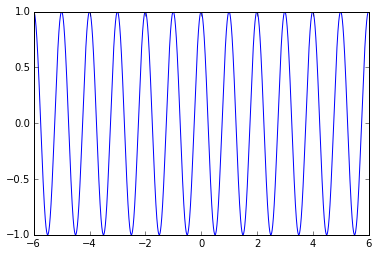

In [7]:
plt.plot(x,y_even)
plt.show()

##### Odd $\rightarrow$ f(n) = -f(-n)

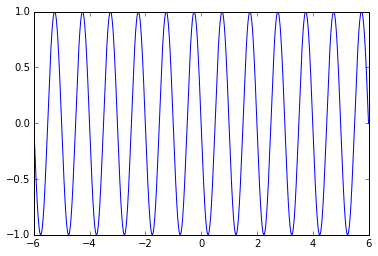

In [8]:
plt.plot(x,y_odd)
plt.show()

#### Convolution

Convolution is also related to cross-correlation.  Given two functions:

$$x_{1}(n) = ( x_{1,0}, x_{1,1}, \ldots, x_{1,N-1} )$$

$$x_{2}(n) = ( x_{2,0}, x_{2,1}, \ldots, x_{2,N-1} )$$

Convolution of the two is:

$$y(n) = x_{1} {\large * } x_{2} = \sum{m=0}^{N-1} x_{1}(m) * x_{2}(n-m)$$




In [9]:
# CODE UP TWO X FUNCTIONS AND CONVOLVE THEM
x1 = np

# Audacity, Sonic Visualiser, SMS Tools

Free sounds - <http://www.freesound.org/people/xserra/packs/13038>

## Sonic Visualiser

VAMP Plugins - <http://www.vamp-plugins.org>

Played with YIN Pitch detection algorithm

## SMS Tools

Github - <http://github.com/MTG/sms-tools>

# Python to Process Sound Files

Sample rate (Hz): 44100
Type and depth of sample: int16
Number of samples: 44100
Duration of sound (seconds): 1.0


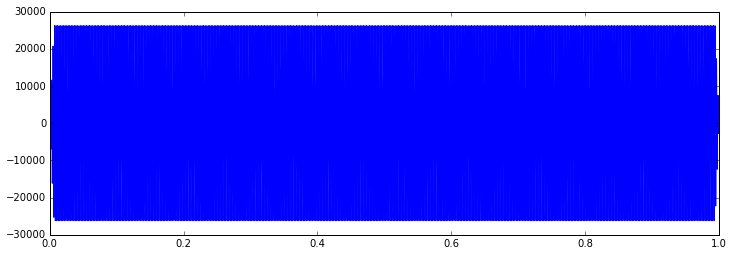

In [10]:
from scipy.io.wavfile import read

sound_fn = "../git_submodules/sms-tools/sounds/sine-440.wav"
[fs, data] = read(sound_fn)

print "Sample rate (Hz): " + str(fs)
print "Type and depth of sample: " + str(data.dtype)
print "Number of samples: " + str(data.size)
print "Duration of sound (seconds): " + str(data.size/float(fs))

period = 1/440.0
T = 1.0/fs
samples_per_period = period / T

# Show 4 waves
nsamples = data.size #int(samples_per_period * 4)
t = np.arange(0, data.size, 1) / float(fs)
plt.figure(figsize=(12,4))
plt.plot(t[0:nsamples], data[0:nsamples])
plt.show()

## To play sound

From Mac - !afplay "file"

From Linux - !play file" -- requires sox package - apt-get install sox

In [11]:
sound_fn = "../git_submodules/sms-tools/sounds/sine-440.wav"
!afplay $sound_fn

# SMS Tools - Spectral Model Synthesis

